In [1]:
import calliope

In [3]:
try:
    calliope.set_log_level('INFO')
except:
    calliope.set_log_verbosity('INFO')
model = calliope.Model('model.yaml')
model.run()


[2020-10-16 17:48:31] INFO     Model: initialising
[2020-10-16 17:48:32] INFO     Model: preprocessing stage 1 (model_run)
[2020-10-16 17:48:32] INFO     NumExpr defaulting to 8 threads.
[2020-10-16 17:48:32] INFO     Model: preprocessing stage 2 (model_data)
[2020-10-16 17:48:32] INFO     Model: preprocessing complete
[2020-10-16 17:48:32] INFO     Backend: starting model run
[2020-10-16 17:48:33] INFO     constraints are loaded in the following order: ['capacity', 'costs', 'dispatch', 'energy_balance', 'network', 'policy', 'conversion', 'conversion_plus', 'group', 'export', 'milp']
[2020-10-16 17:48:45] INFO     Backend: model generated. Time since start of model run: 0:00:12.611530
[2020-10-16 17:48:45] INFO     Backend: sending model to solver
[2020-10-16 17:48:54] DEBUG    Using license file C:\Users\payam\gurobi.lic
[2020-10-16 17:48:54] DEBUG    Academic license - for non-commercial use only
[2020-10-16 17:48:55] DEBUG    Read LP format model from file C:\Users\payam\AppData\Loc

In [ ]:
nodes = ['UE',
'UW',
'NP',
'BA',
'AH',
'WP',
'CP',
'EP',
'AA']

for node in nodes:
    model.plot.timeseries(subset={'locs': [node]})

In [ ]:
model.plot.timeseries()

In [ ]:
variable.production.sum(axis=0)

In [4]:
import cal_graph as CG
variable=CG.C_Graph(model=model,ex_path=r'Graph_inputs.xlsx',unit='kW')

C_Graph: A python class for customizing calliope outputs developed in Fondazione Eni Enrico Mattei. 
 Version 0.1: (Single Carrier)


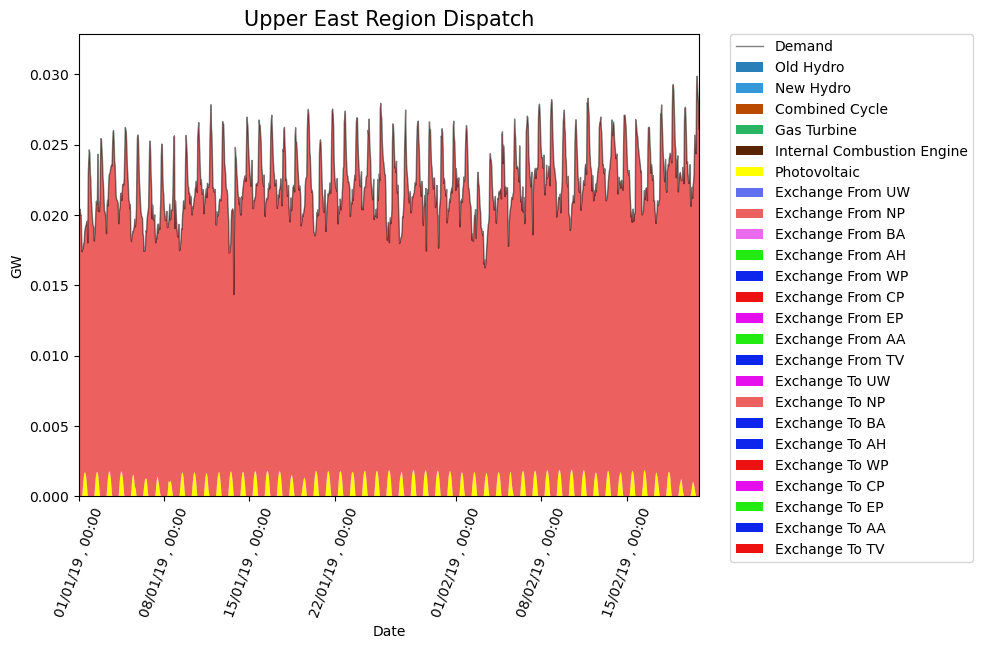

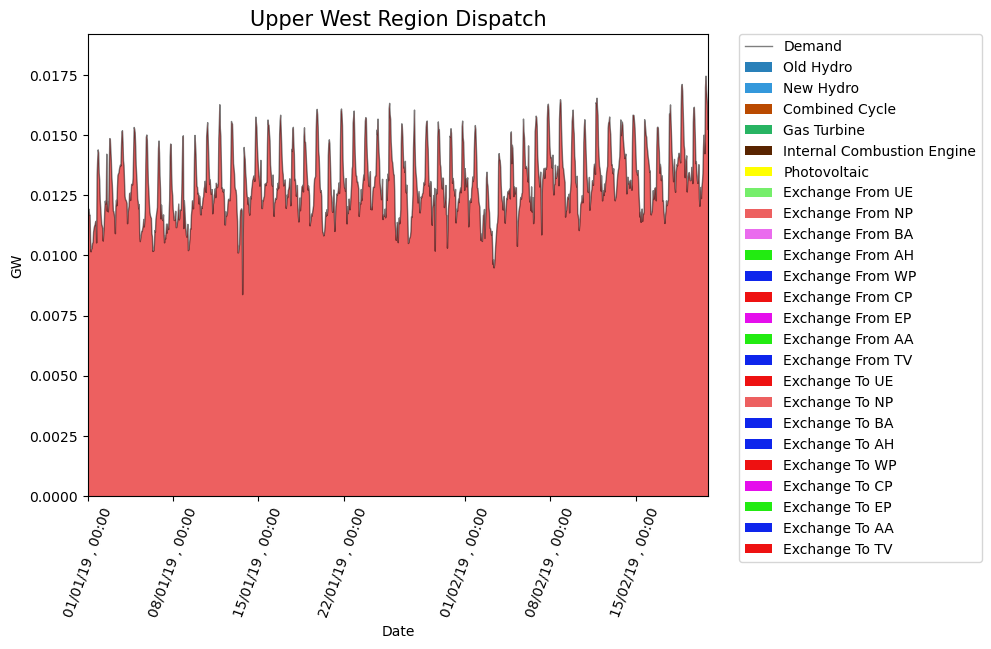

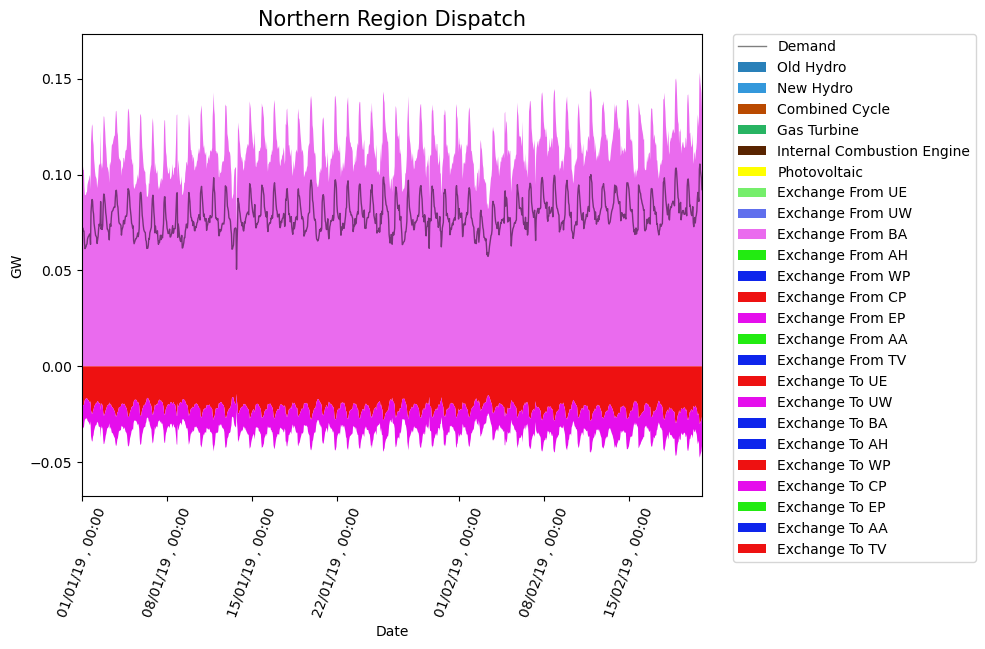

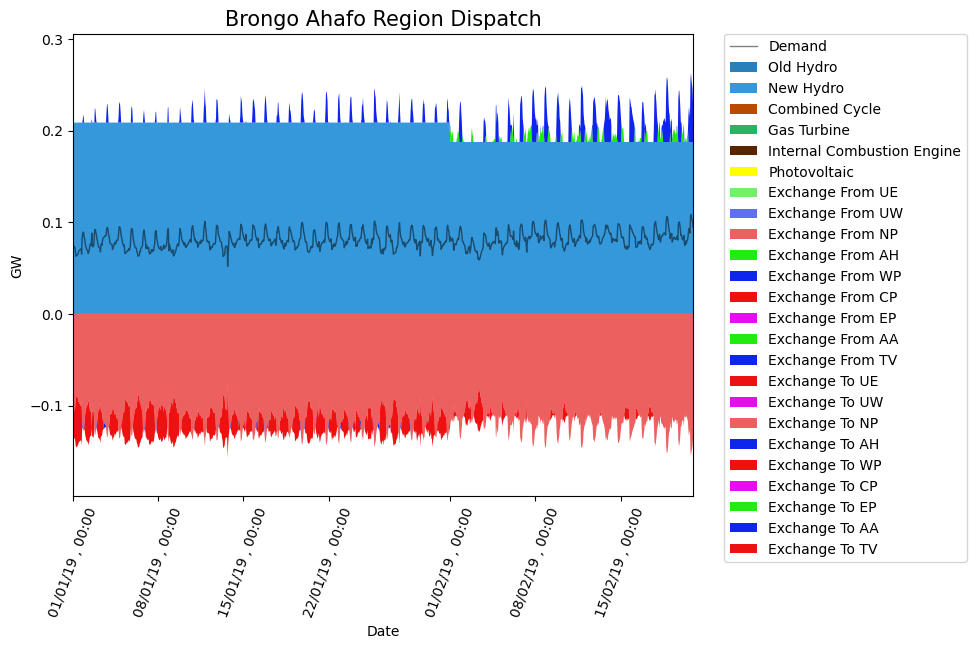

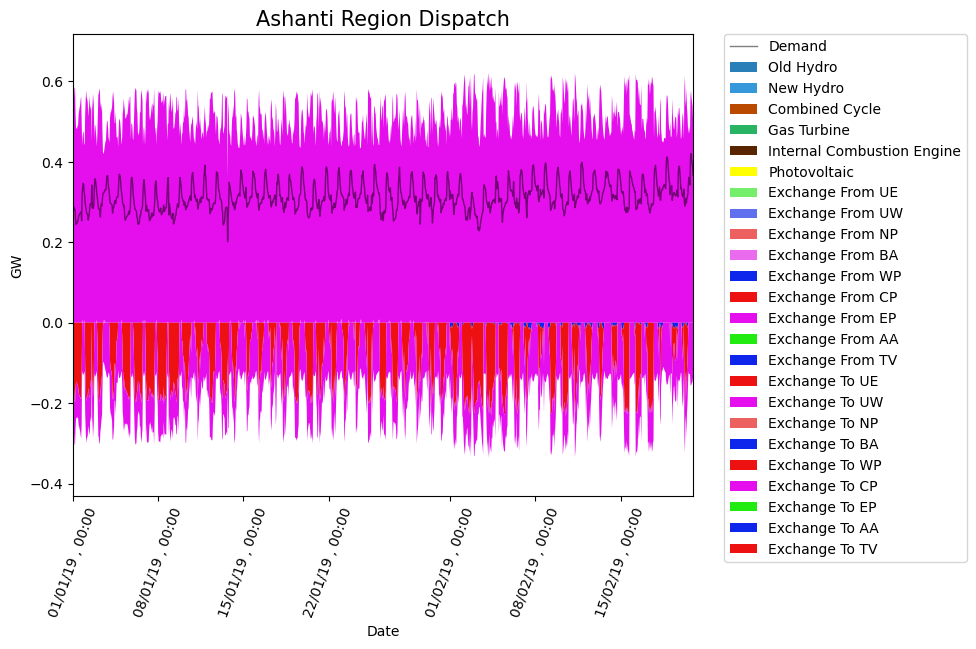

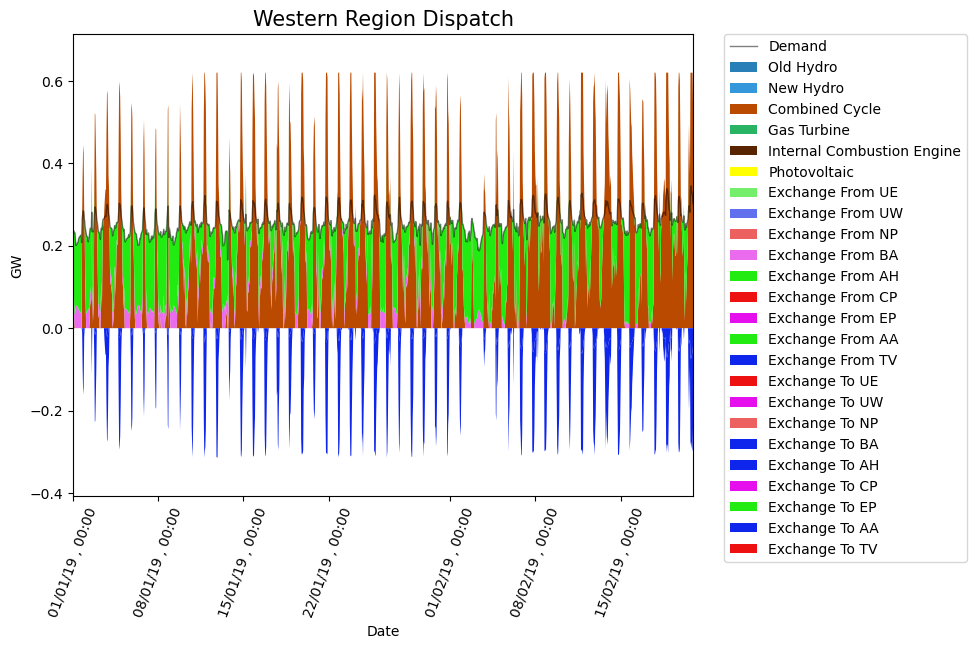

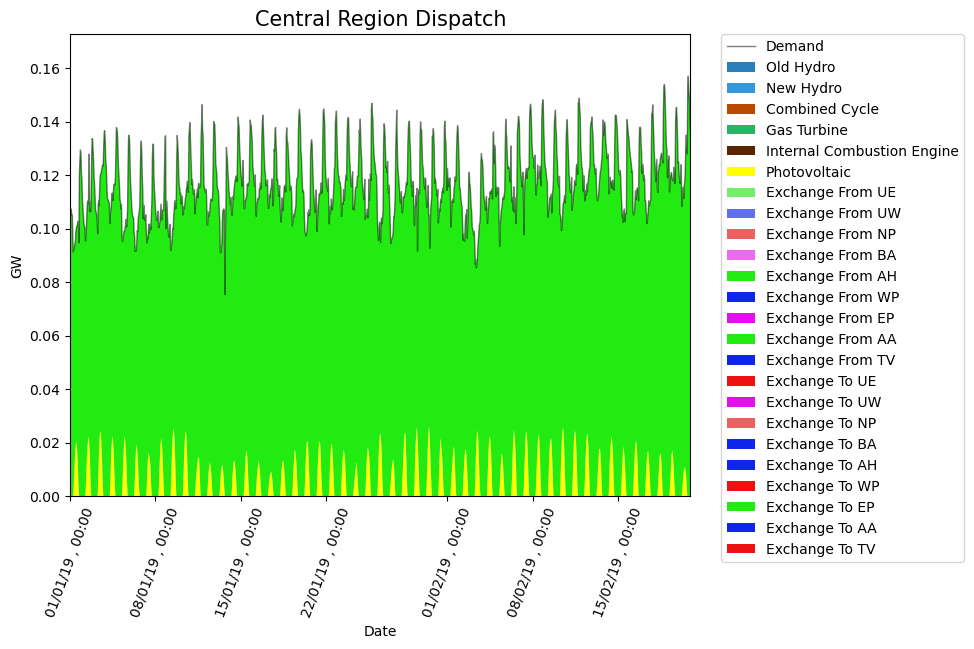

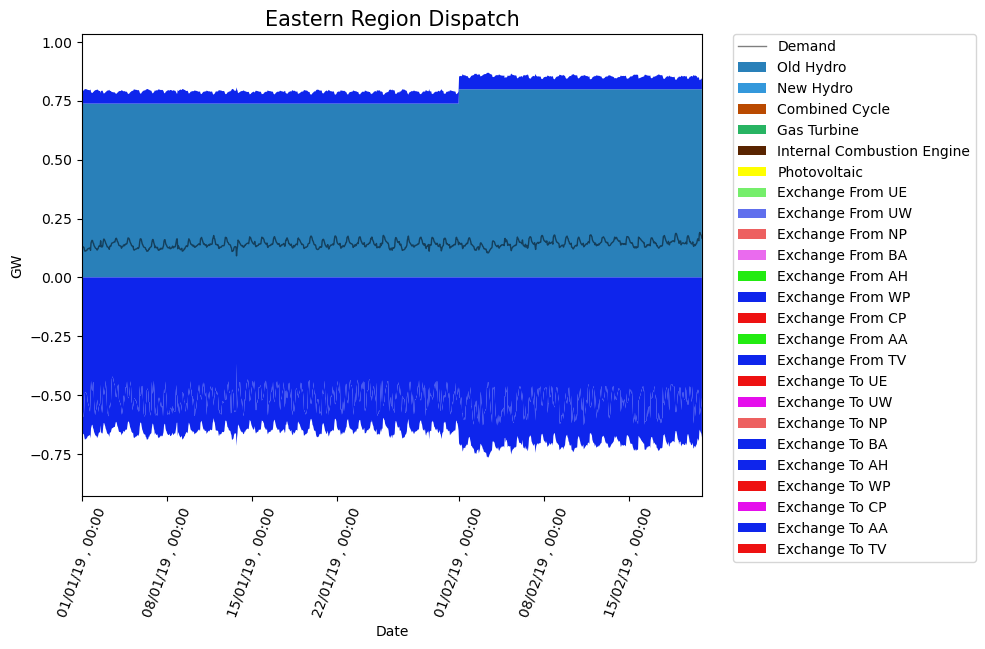

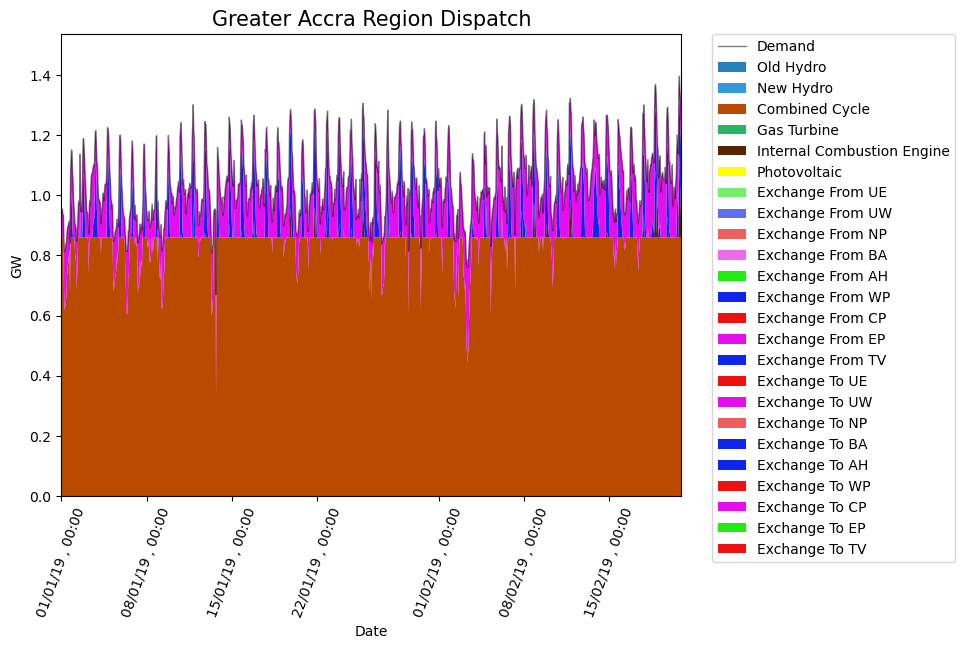

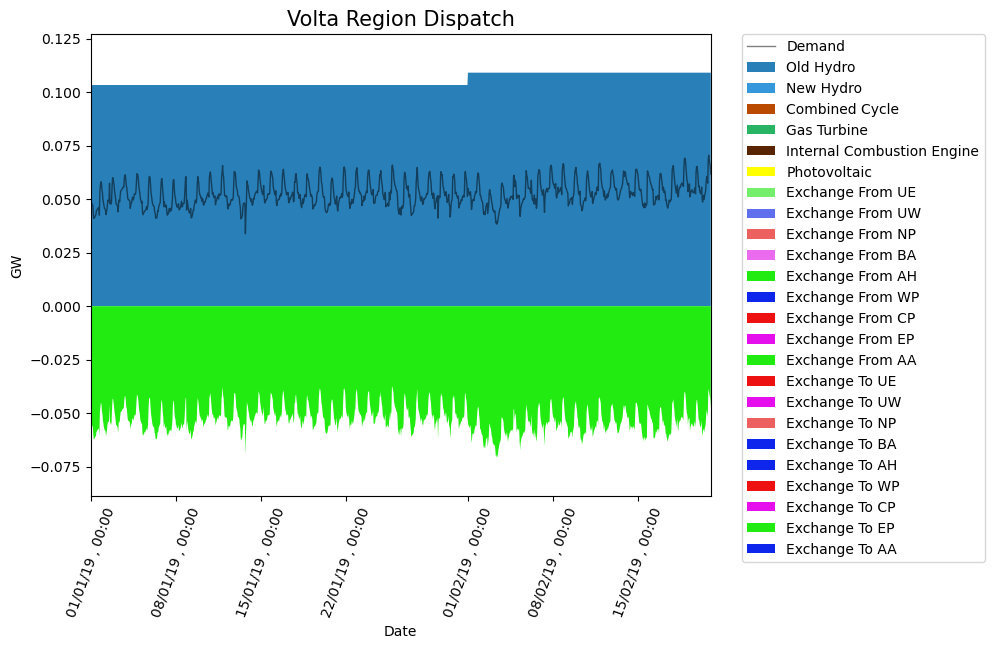

In [7]:
variable.node_dispatch(unit='GW',average='hourly',x_ticks='data',fig_format='svg')

In [ ]:
variable.system_dispatch(unit='GW',average='weekly',x_ticks='date',fig_format='svg')

In [ ]:
variable.ins_cap_plot(kind='bar')



In [ ]:
variable.node_pie(unit='GWh',v_round=3,rational='consumption',kind='absolute',style='ggplot',title_font=20)

In [ ]:
variable.system_pie()